In [16]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use(['ggplot', 'seaborn-poster'])

# Supervised Learning
## k Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
X  = np.random.uniform(low=-np.pi, high=np.pi, size=(100,1))
XT = np.random.uniform(low=-np.pi, high=np.pi, size=(100,1))

y  = np.sin(X ) + np.random.normal(scale=0.1, size=(100,1))
yT = np.sin(XT) + np.random.normal(scale=0.1, size=(100,1))

<IPython.core.display.Javascript object>


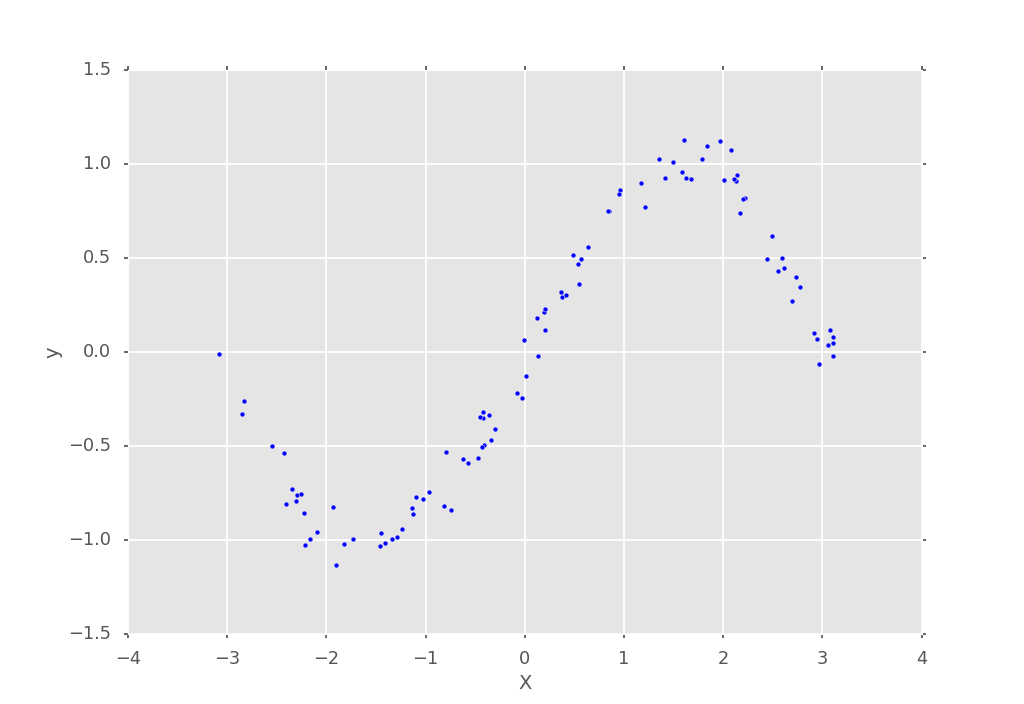

In [19]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(X, y, label='Samples')
axes.set_xlabel('X')
axes.set_ylabel('y')

In [6]:
@interact(x=(1, 10))
def kNN(x=5):
    # use x as n_neighbors parameter
    try:
        axes.lines[0].remove()
    except:
        pass
    knr = KNeighborsRegressor(n_neighbors=x); knr.fit(X, y)
    xs = np.linspace(-np.pi, np.pi, 100)[:, None]; ys = knr.predict(xs)
    print(np.linalg.norm(knr.predict(XT)-yT))
    axes.plot(xs, ys, label='Regression Line')
    axes.legend()

ValueError: Found input variables with inconsistent numbers of samples: [150, 100]

# Unsupervised Learning
## k Means

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [8]:
# use 2 features from the iris dataset, just for fun
X = load_iris().data[:, :2]

In [9]:
def plot_kmeans(x, means_plot=None):
    try:
        axes.images[0].remove()
        means_plot.remove()
    except:
        pass
    km = KMeans(n_clusters=x); km.fit(X)
    # plot what each region would be labelled as
    x = np.linspace(X[:,0].min(), X[:,0].max(), 1000); y = np.linspace(X[:,1].min(), X[:,1].max(), 1000); 
    xs, ys = np.meshgrid(x, y)
    zs = km.predict(np.asarray([xs.flatten(), ys.flatten()]).T)
    axes.imshow(zs.reshape(xs.shape), extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap=plt.cm.Set3)
    # plot centroids
    means = km.cluster_centers_
    means_plot = axes.scatter(means[:,0], means[:,1], s=200, marker='x', c='w', linewidths=5)
    return means_plot

<IPython.core.display.Javascript object>


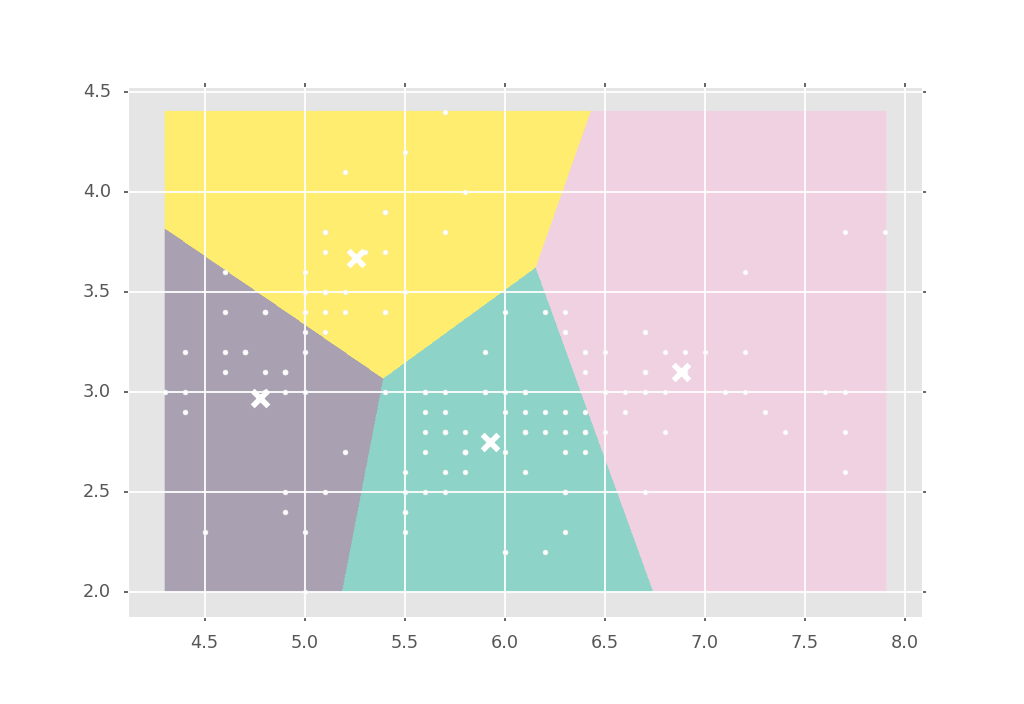

In [10]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(X[:, 0], X[:, 1], c='w')

In [11]:
means_plot = None
@interact(x=(1, 10))
def interact_kmeans(x=5):
    # use x as k, the number of centroids
    global means_plot
    # pass back centroids handler so that we can redraw when x changes
    means_plot = plot_kmeans(x, means_plot)

# Reinforcement Learning
## Thompson Sampling

In [12]:
def ts(x):
    try:
        axes.lines[0].remove()
    except:
        pass
    theta_1 = 0.8 # true parameter for bernoulli arm 1
    theta_2 = 0.4 # true parameter for bernoulli arm 2
    regrets = [0] # keep track of regrets
    # initialise (beta) priors' parameters
    S_1, S_2 = 1, 1
    F_1, F_2 = 1, 1
    best_arm = 1 if theta_1 > theta_2 else 2
    for t in range(1000):
        theta_hat_1 = np.random.beta(S_1, F_1) # sample from prior 1
        theta_hat_2 = np.random.beta(S_2, F_2) # sample from prior 2
        arm = 1 if theta_hat_1 > theta_hat_2 else 2 # choose "better" arm
        # get reward, update priors' parameters        
        if arm == 1:
            reward = np.random.binomial(1, theta_1)
            S_1 += reward * x 
            F_1 += (1 - reward) * x
        else:
            reward = np.random.binomial(1, theta_2)
            S_2 += (reward) * x
            F_2 += (1 - reward) * x
        # record results
        regrets.append(1 * (best_arm != arm))
    # visualise
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlabel('t')
    axes.set_ylabel('regret')
    axes.plot(range(len(regrets)), np.cumsum(regrets))
    axes.set_title('Regret vs. time for Bernoulli Bandits, pseudocount='+ str(x))

<IPython.core.display.Javascript object>


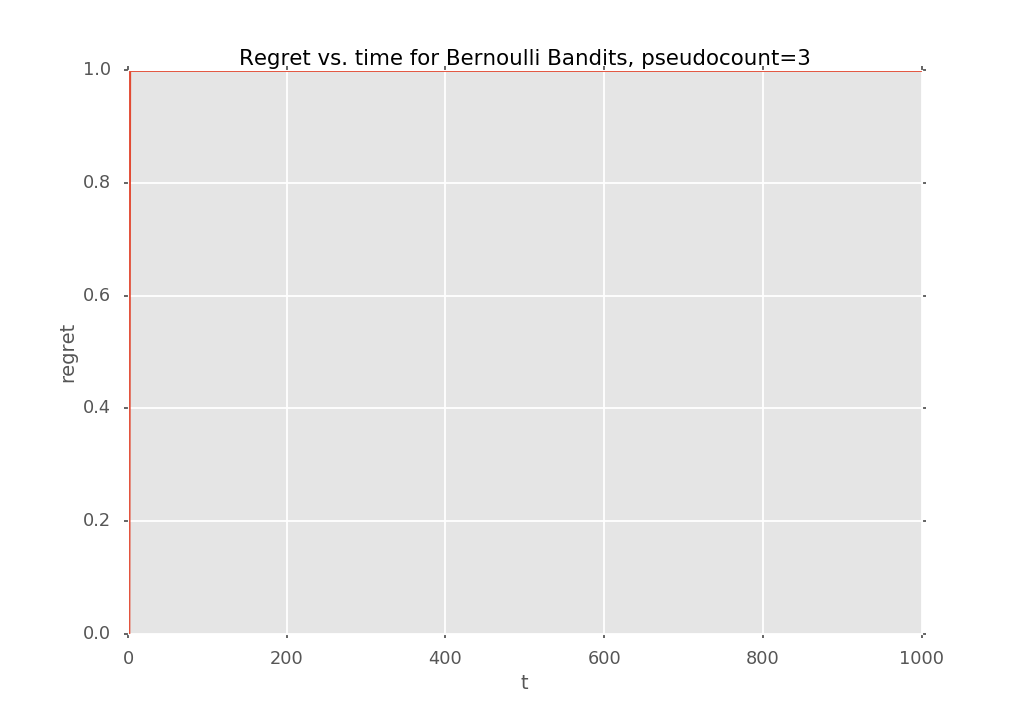

In [13]:
@interact(x=(1, 10))
def interact_ts(x=1):
    ts(x)